In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

def image_to_matrix(image_path):
    img = Image.open(image_path).convert('L')  
    img_matrix = np.array(img)
    return img_matrix


image_folder = 'fluid_flow_images'
A = []


for i, filename in enumerate(os.listdir(image_folder)):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        image_path = os.path.join(image_folder, filename)
        img_matrix = image_to_matrix(image_path)

        A.append(img_matrix.flatten())

A = np.array(A).T
print(f"Combined matrix shape: {A.shape}")


Combined matrix shape: (2073600, 48)


In [2]:
A.shape


(2073600, 48)

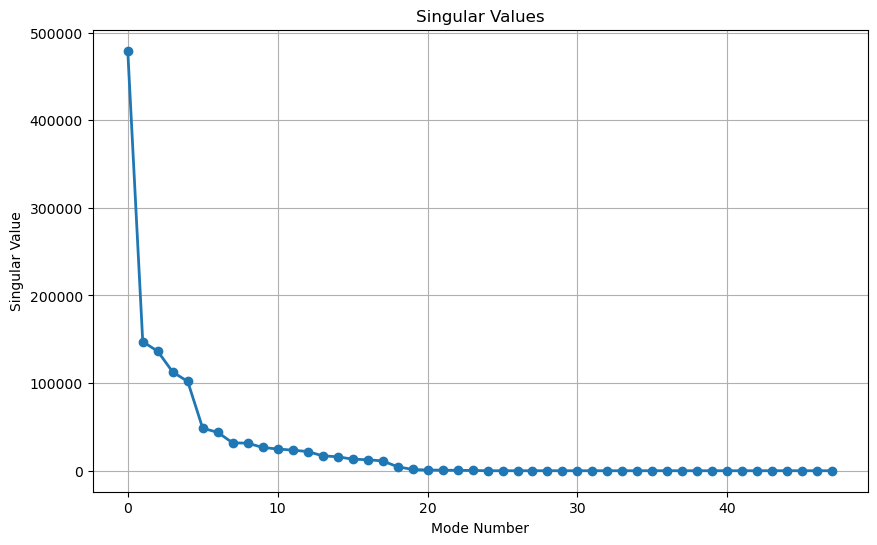

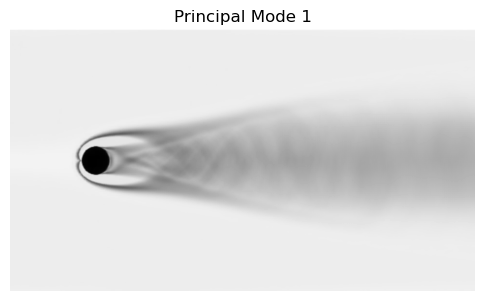

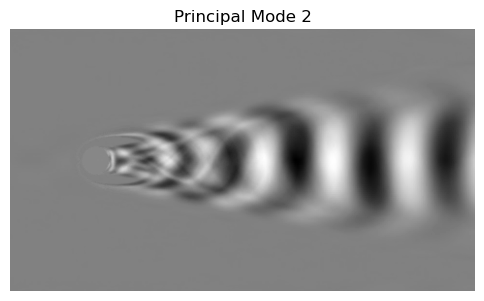

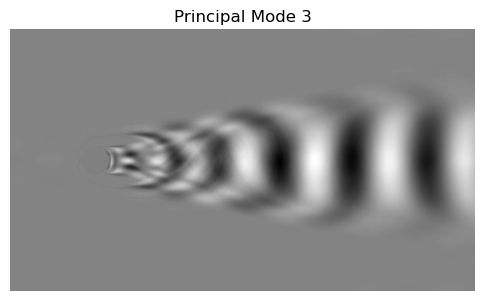

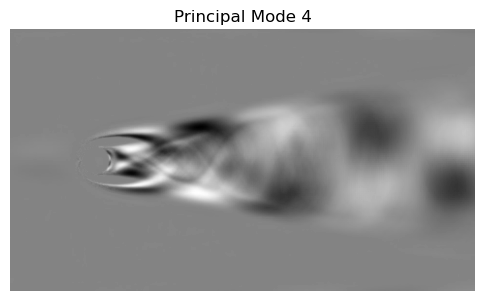

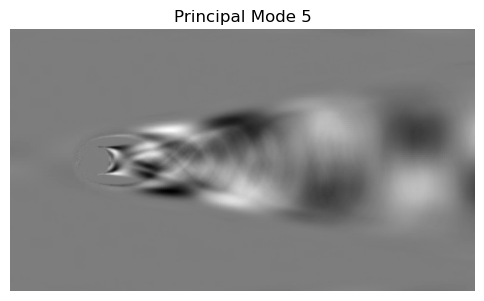

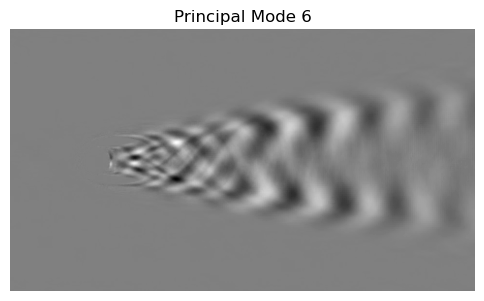

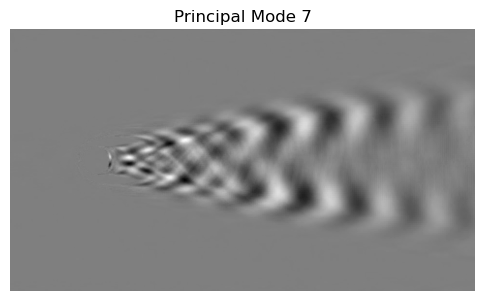

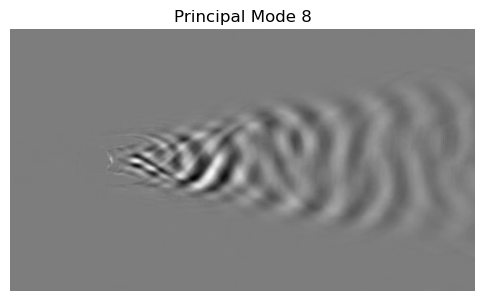

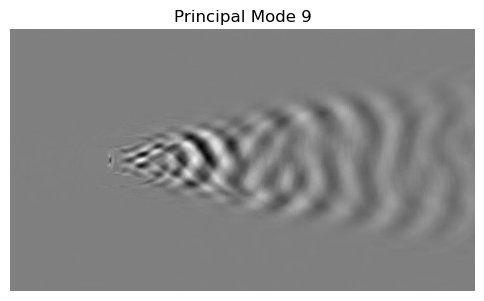

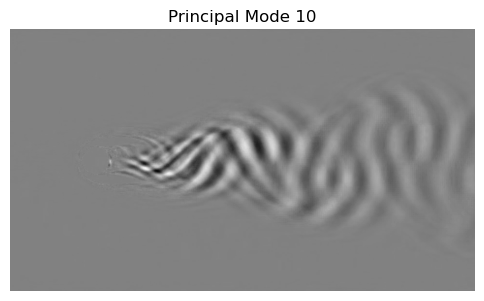

In [3]:
img_height = 1080
img_width = 1920

# Perform SVD on the matrix A
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# Principal modes are columns of U
principal_modes = U

# Singular values
singular_values = S

# Plot the singular values to see their relative magnitudes
plt.figure(figsize=(10, 6))
plt.plot(singular_values, 'o-', linewidth=2)
plt.xlabel('Mode Number')
plt.ylabel('Singular Value')
plt.title('Singular Values')
plt.grid(True)
plt.show()

num_modes_to_display = 10 
for i in range(num_modes_to_display):
    mode_image = principal_modes[:, i].reshape((img_height, img_width))
    plt.figure(figsize=(6, 6))
    plt.imshow(mode_image, cmap='gray')
    plt.title(f'Principal Mode {i+1}')
    plt.axis('off')
    plt.show()


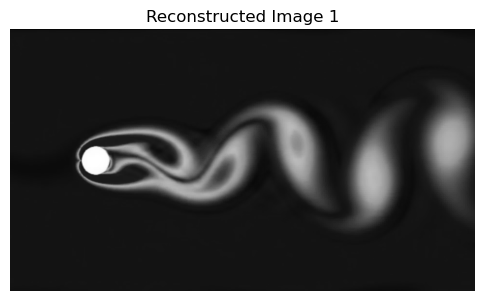

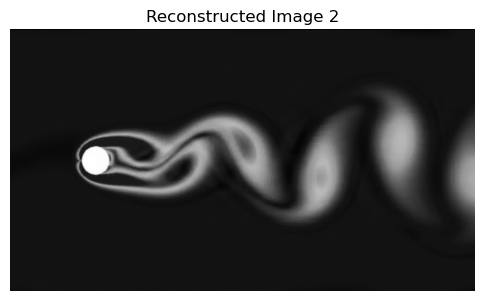

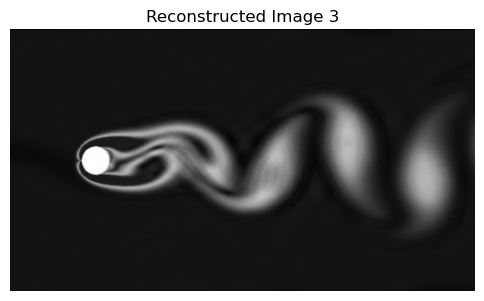

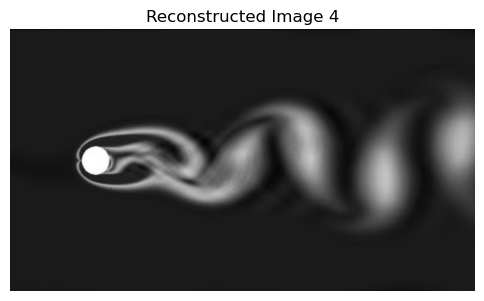

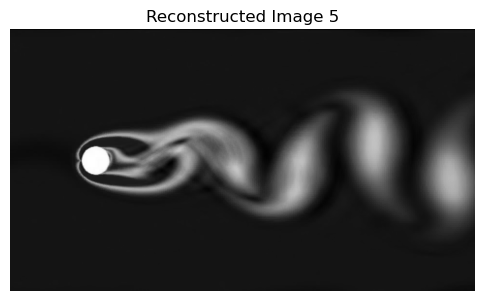

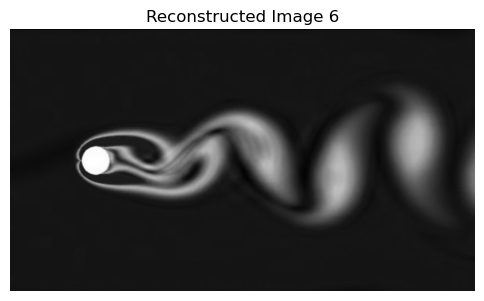

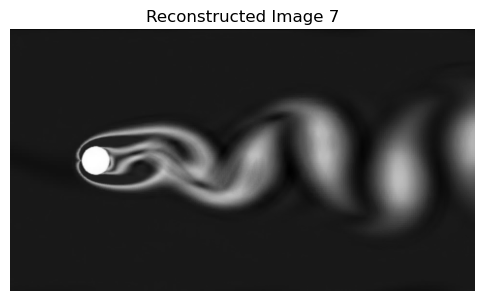

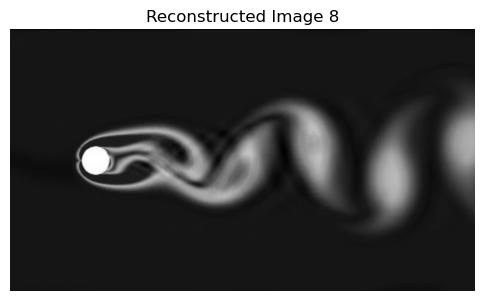

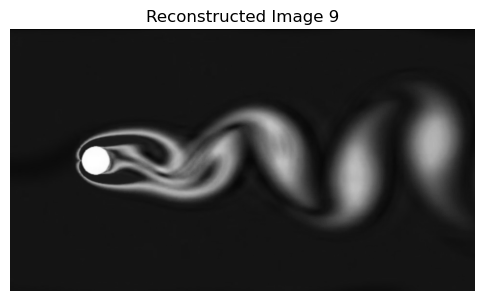

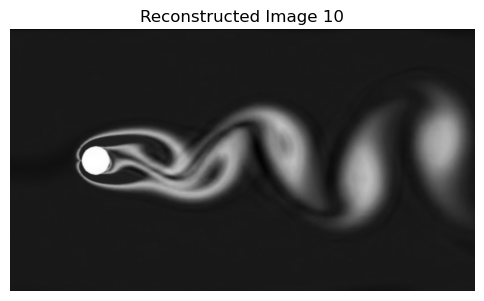

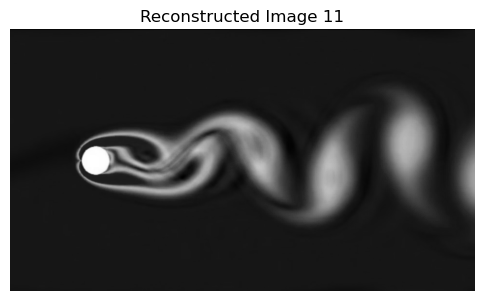

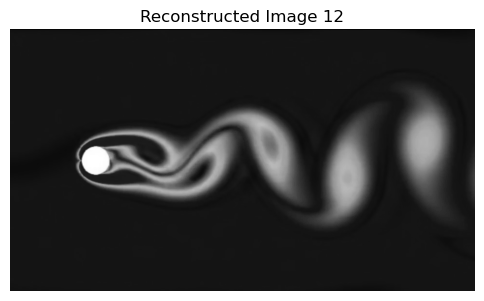

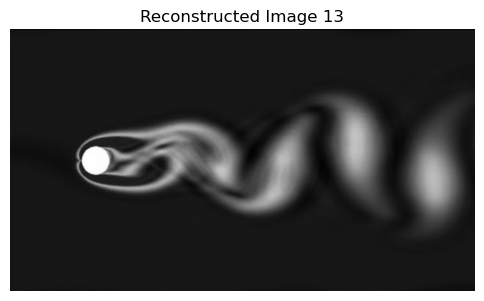

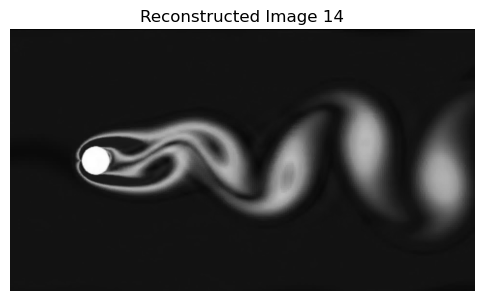

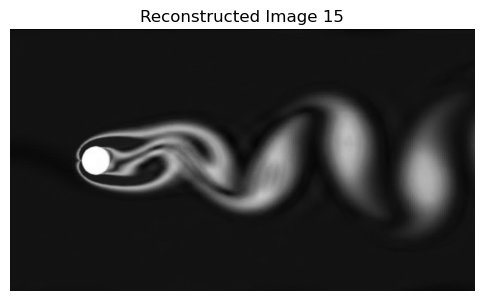

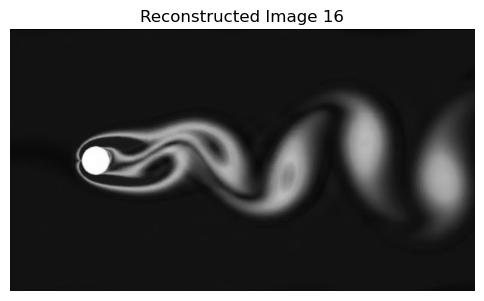

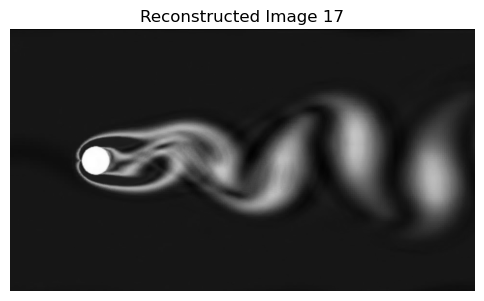

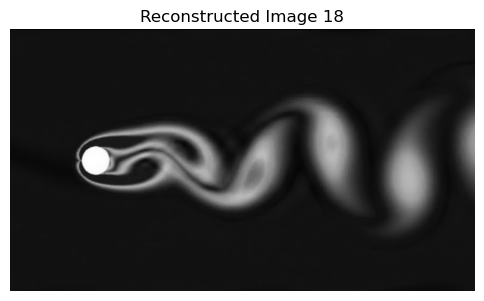

In [4]:
import numpy as np
import matplotlib.pyplot as plt

num_modes_to_use = 10

U_reduced = U[:, :num_modes_to_use]
S_reduced = np.diag(S[:num_modes_to_use])
Vt_reduced = Vt[:num_modes_to_use, :]

A_reconstructed = U_reduced @ S_reduced @ Vt_reduced

A_reconstructed = A_reconstructed.T

for i in range(A_reconstructed.shape[0]-30):
    reconstructed_image = A_reconstructed[i].reshape((img_height, img_width))
    plt.figure(figsize=(6, 6))
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Reconstructed Image {i+1}')
    plt.axis('off')
    plt.show()


In [5]:
# Performing POD on a sine wave
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

def image_to_matrix(image_path):
    img = Image.open(image_path).convert('L')
    img_matrix = 255 - np.array(img)
    return img_matrix


image_folder = '50-img-wave'
output_folder = 'wave_images_matrix'

B = []

for i, filename in enumerate(os.listdir(image_folder)):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        image_path = os.path.join(image_folder, filename)
        img_matrix = image_to_matrix(image_path)

        B.append(img_matrix.flatten())

B = np.array(B).T


In [6]:
B.shape


(1557360, 100)

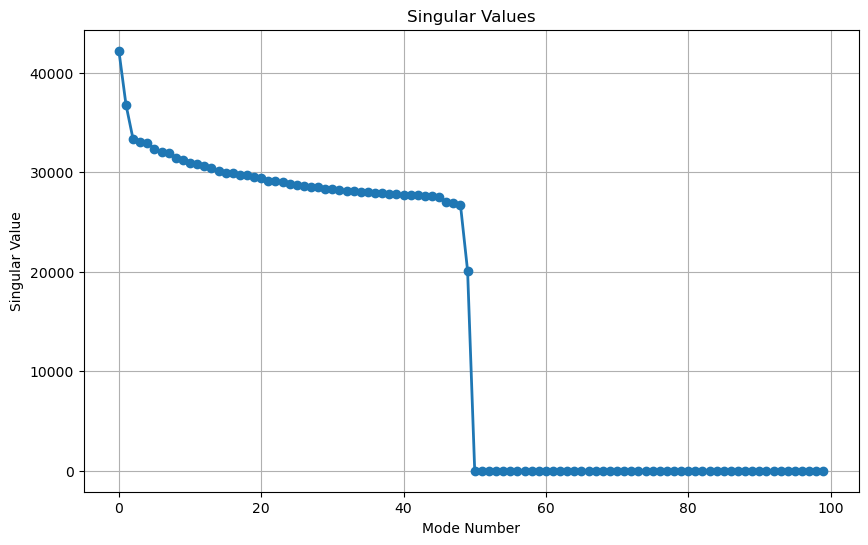

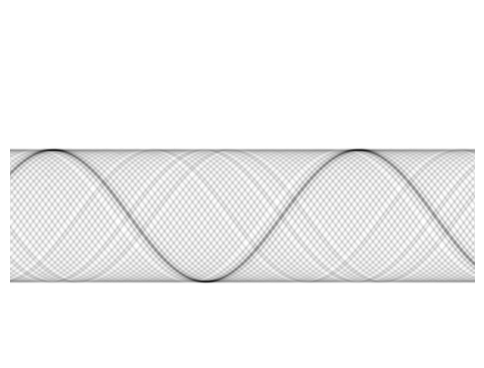

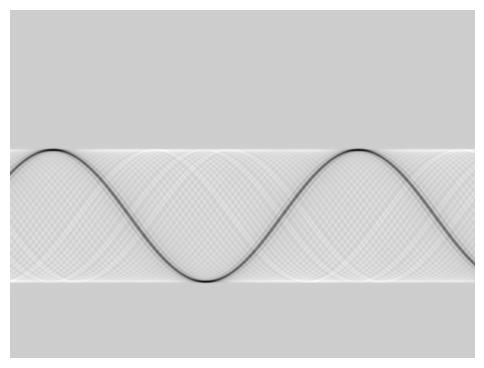

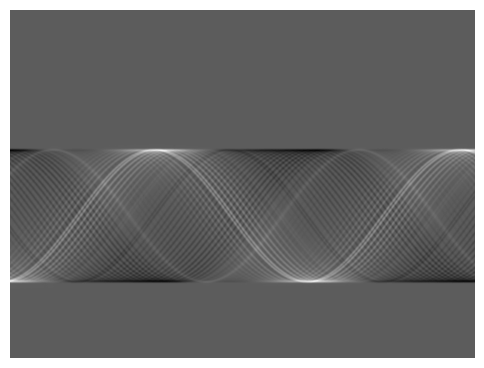

In [7]:
img_height = 1080
img_width = 1442

U, S, Vt = np.linalg.svd(B, full_matrices=False)

principal_modes = U

singular_values = S

plt.figure(figsize=(10, 6))
plt.plot(singular_values, 'o-', linewidth=2)
plt.xlabel('Mode Number')
plt.ylabel('Singular Value')
plt.title('Singular Values')
plt.grid(True)
plt.show()

num_modes_to_display = 3
for i in range(num_modes_to_display):
    mode_image = principal_modes[:, i].reshape((img_height, img_width))
    plt.figure(figsize=(6, 6))
    plt.imshow(mode_image, cmap='gray')
    plt.axis('off')
    plt.show()
